# Logistic regression: manual calculation of model probabilities from feature vales and model coefficients

> *Motivation*: To be able to investigate (for debugging) the link between model weights, feature values, and predicted probability in a logistic regression model. 

This notebook shows you how to fit a logistic regression model using sklearn library. Then extract all of the necessary model components in order to calculate the model output using your own code (without calling the sklearn library).

## Import libraries

In [1]:
# Turn warnings off to keep notebook tidy
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np

from pylab import *
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import math #used in the sigmoid function

## Function to standardise data

This converts all features to have a mean of 0 and a standard deviation of 1.

In [2]:
def standardise_data(X_train, X_test):
    """
    Converts all data to a similar scale.
    Standardisation subtracts mean and divides by standard deviation
    for each feature.
    Standardised data will have a mena of 0 and standard deviation of 1.
    The training data mean and standard deviation is used to standardise both
    training and test set data.
    """
    
    # Initialise a new scaling object for normalising input data
    sc = StandardScaler() 

    # Set up the scaler just on the training set
    sc.fit(X_train)

    # Apply the scaler to the training and test sets
    train_std=sc.transform(X_train)
    test_std=sc.transform(X_test)
    
    return train_std, test_std

## Load data

In [3]:
data_loc = '../data/10k_training_test/'

train = pd.read_csv(data_loc + 'cohort_10000_train.csv')
test = pd.read_csv(data_loc + 'cohort_10000_test.csv')

## Initialise global objects

In [4]:
hospitals = set(train['StrokeTeam'])
hospital_loop_order = list(set(train['StrokeTeam']))

n_hospitals = len(hospital_loop_order)
n_patients = test.shape[0]

## Model: Logistic regression model. 

A logistic regression model trained using one-hot encoded hospitals

### Train model

In [5]:
# Get X and y
X_train = train.drop('S2Thrombolysis', axis=1)
X_test = test.drop('S2Thrombolysis', axis=1)
y_train = train['S2Thrombolysis']
y_test = test['S2Thrombolysis']

# One hot encode hospitals
list(X_train) == list(X_test)
X_train_hosp = pd.get_dummies(X_train['StrokeTeam'], prefix = 'team')
X_train = pd.concat([X_train, X_train_hosp], axis=1)
X_train.drop('StrokeTeam', axis=1, inplace=True)
X_test_hosp = pd.get_dummies(X_test['StrokeTeam'], prefix = 'team')
X_test = pd.concat([X_test, X_test_hosp], axis=1)
X_test.drop('StrokeTeam', axis=1, inplace=True)

# Standardise X data
X_train_std, X_test_std = standardise_data(X_train, X_test)

# Store number of features
n_features = X_test_std.shape[1]

# Define model
model = LogisticRegression(solver='lbfgs')

# Fit model
model.fit(X_train_std, y_train)

# Get predicted probabilities and class
y_probs = model.predict_proba(X_test_std)[:,1]
y_pred = y_probs > 0.5

# Show accuracy
accuracy = np.mean(y_pred == y_test)
print (f'Accuracy: {accuracy}')

Accuracy: 0.8261


### How to calculate the logistic regression output maunally

Use the data to represent the test set outcome.

X_test_std: the input values for the patients in the test set \
y_probs: the model output (probability) for the patients in the test set

Used these online resources:\
https://stackoverflow.com/questions/18993867/scikit-learn-logistic-regression-model-coefficients-clarification \
https://stackoverflow.com/questions/3985619/how-to-calculate-a-logistic-sigmoid-function-in-python \
https://stackoverflow.com/questions/4050907/python-overflowerror-math-range-error \

In [6]:
def sigmoid(x):
    """
    return sigmoid of given value
    """
    try:
        ans = math.exp(x)
    except OverflowError:
        ans = float('inf')
        
    return (1 / (1 + ans))

<AxesSubplot:xlabel='x', ylabel='y'>

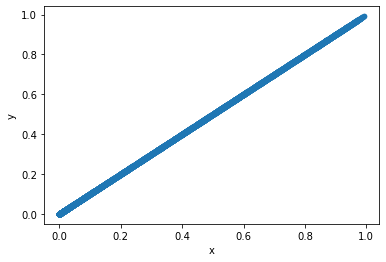

In [7]:
# initialise list to store result
result = []

# Get feature weights
feature_weights = model.coef_[0]

# calculate the LR outcome
# Step 1. sumproduct of features with coefficient, plus intercept
lr_arr = np.dot(X_test_std, feature_weights) + model.intercept_
# Step 2. take one minus sigmoid of result
result = [(1-sigmoid(i)) for i in lr_arr]

# put data in dataframe for scatterplot
df_temp = pd.DataFrame()
df_temp['x'] = result
df_temp['y'] = y_probs

#plot scatter of model output vs manual calculation
df_temp.plot.scatter(x='x', y='y')

### Extra information

Understand the sigmoid function

<AxesSubplot:xlabel='x', ylabel='y'>

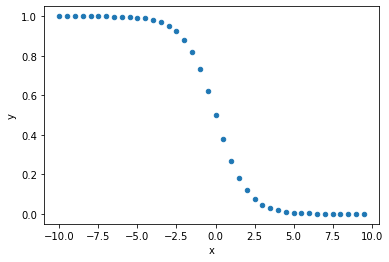

In [8]:
# create values to plot
arr = np.arange(-10, 10, 0.5)
sigmoid_result = [(sigmoid(i)) for i in arr]

# put data in dataframe for scatterplot
df_temp = pd.DataFrame()
df_temp['x'] = arr
df_temp['y'] = sigmoid_result

# plot scatter of model output vs manual calculation
df_temp.plot.scatter(x='x', y='y')

1 minus sigmoid

<AxesSubplot:xlabel='x', ylabel='y'>

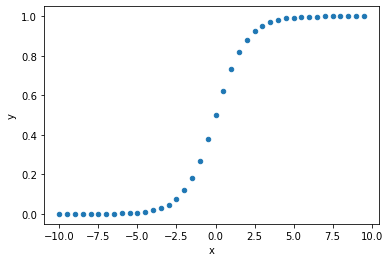

In [9]:
# create values to plot
arr = np.arange(-10, 10, 0.5)
sigmoid_result = [(1-sigmoid(i)) for i in arr]

# put data in dataframe for scatterplot
df_temp = pd.DataFrame()
df_temp['x'] = arr
df_temp['y'] = sigmoid_result

#plot scatter of model output vs manual calculation
df_temp.plot.scatter(x='x', y='y')